In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AEMnTwumHE3YmZLw3zaK5SRw56Yu9D0SkAcfwoPx1lU_n6-jtMxO4U
Mounted at /content/drive/


# **1. Import libraries**

In [163]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline


# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings("ignore")


# **2. Download datasets**

In [164]:
cv_n_split = 3
random_state = 42
test_train_split_part = 0.2

In [165]:
metrics_all = {1 : 'r2_score', 2: 'acc', 3 : 'rmse', 4 : 're'}
metrics_now = [1, 2, 3, 4] # you can only select some numbers of metrics from metrics_all

In [166]:
data = pd.read_csv("/content/drive/My Drive/Dataset/Colab Notebooks/heart.csv") 

In [167]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [168]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# **3. EDA (Exploratory Data Analysis) & F.E (Feature Engineering)**

F.E (Feature Engineering)

In [170]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [171]:
def fe_creation(df):
    df['age2'] = df['age']//10
    df['trestbps2'] = df['trestbps']//10
    df['chol2'] = df['chol']//20
    df['thalach2'] = df['thalach']//10
    df['oldpeak2'] = df['oldpeak']//0.4
    for i in ['sex', 'age2', 'fbs', 'restecg', 'exang','thal', ]:
        for j in ['cp','trestbps2', 'chol2', 'thalach2', 'oldpeak2', 'slope', 'ca']:
            df[i + "_" + j] = df[i].astype('str') + "_" + df[j].astype('str')
    return df

data = fe_creation(data)

In [172]:
# Determination categorical features
categorical_columns = []
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
features = data.columns.values.tolist()
for col in features:
    if data[col].dtype in numerics: continue
    categorical_columns.append(col)
categorical_columns

['sex_cp',
 'sex_trestbps2',
 'sex_chol2',
 'sex_thalach2',
 'sex_oldpeak2',
 'sex_slope',
 'sex_ca',
 'age2_cp',
 'age2_trestbps2',
 'age2_chol2',
 'age2_thalach2',
 'age2_oldpeak2',
 'age2_slope',
 'age2_ca',
 'fbs_cp',
 'fbs_trestbps2',
 'fbs_chol2',
 'fbs_thalach2',
 'fbs_oldpeak2',
 'fbs_slope',
 'fbs_ca',
 'restecg_cp',
 'restecg_trestbps2',
 'restecg_chol2',
 'restecg_thalach2',
 'restecg_oldpeak2',
 'restecg_slope',
 'restecg_ca',
 'exang_cp',
 'exang_trestbps2',
 'exang_chol2',
 'exang_thalach2',
 'exang_oldpeak2',
 'exang_slope',
 'exang_ca',
 'thal_cp',
 'thal_trestbps2',
 'thal_chol2',
 'thal_thalach2',
 'thal_oldpeak2',
 'thal_slope',
 'thal_ca']

In [173]:
# Encoding categorical features
for col in categorical_columns:
    if col in data.columns:
        le = LabelEncoder()
        le.fit(list(data[col].astype(str).values))
        data[col] = le.transform(list(data[col].astype(str).values))

In [174]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age2,trestbps2,chol2,thalach2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalach2,sex_oldpeak2,sex_slope,sex_ca,age2_cp,age2_trestbps2,age2_chol2,age2_thalach2,age2_oldpeak2,age2_slope,age2_ca,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,6,14,11,15,5.0,7,15,16,16,18,3,4,16,28,31,33,35,10,13,7,15,17,18,19,3,5,3,4,1,5,7,0,0,3,4,1,5,8,0,0,5,4,2,7,8,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,3,13,12,18,8.0,6,14,17,19,21,3,4,3,3,3,5,6,1,1,2,3,2,8,12,0,0,6,14,17,20,22,3,5,2,3,2,8,11,0,0,8,11,10,18,18,5,5
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,4,13,10,17,3.0,1,3,0,7,4,2,0,6,9,8,13,11,6,3,1,3,0,7,7,2,0,1,3,0,7,5,2,0,1,3,0,7,6,2,0,7,11,8,17,13,7,5
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,5,12,11,17,2.0,5,13,16,18,15,5,4,10,14,19,23,21,9,8,1,2,1,7,6,2,0,5,13,16,19,16,5,5,1,2,1,7,5,2,0,7,10,9,17,12,7,5
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,5,12,17,16,1.0,0,2,7,6,1,2,0,9,14,25,22,17,9,8,0,2,7,6,1,2,0,4,13,22,18,13,5,5,4,12,23,19,14,5,5,6,10,15,16,11,7,5


EDA (Exploratory Data Analysis) 

In [175]:
pd.set_option('max_columns', 70)

In [176]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age2,trestbps2,chol2,thalach2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalach2,sex_oldpeak2,sex_slope,sex_ca,age2_cp,age2_trestbps2,age2_chol2,age2_thalach2,age2_oldpeak2,age2_slope,age2_ca,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,4.983498,12.927393,11.841584,14.567657,2.250825,3.699670,10.511551,14.184818,12.432343,10.099010,3.448845,3.462046,9.907591,16.745875,22.194719,21.353135,20.353135,8.349835,8.765677,1.561056,4.630363,6.739274,6.854785,5.798680,1.844884,1.471947,3.075908,8.759076,11.795380,11.234323,9.356436,2.983498,3.366337,2.273927,6.257426,9.511551,9.135314,7.594059,2.379538,2.363036,8.231023,14.320132,16.871287,19.336634,15.805281,7.339934,7.389439
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.929497,1.799929,2.625900,2.306314,2.697152,2.085642,5.339379,7.496942,5.642895,6.438972,1.510402,2.229627,3.759056,8.624897,10.451641,9.416629,10.547467,2.767430,4.628004,1.836550,4.555253,7.173905,5.265661,5.887106,1.201144,2.172611,2.374850,5.810875,8.596802,6.950717,6.662017,1.746252,2.740629,1.751314,5.189751,8.412327,5.757647,7.692146,1.385059,2.668225,2.464200,6.131006,8.455176,7.232575,7.187994,1.875237,3.165442
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,9.000000,6.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,4.000000,12.000000,10.000000,13.000000,0.000000,2.000000,4.500000,7.500000,6.000000,4.000000,2.000000,1.000000,7.000000,9.000000,15.500000,13.000000,11.000000,6.000000,4.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,3.000000,3.000000,5.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,5.000000,0.000000,1.000000,0.000000,7.000000,10.000000,10.000000,15.000000,10.000000,6.000000,5.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,5.000000,13.000000,12.000000,15.000000,2.000000,4.000000,13.000000,16.000000,15.000000,10.000000,4.000000,4.000000,10.000000,15.000000,21.000000,21.000000,19.000000,8.000000,8.000000,1.000000,3.000000,3.000000,6.000000,6.000000,2.000000,0.000000,4.000000,11.000000,15.000000,13.000000,12.000000,3.00000

# **4. Preparing to modeling**

In [177]:
target_name = 'target'
target0 = data[target_name]
train0 = data.drop([target_name], axis=1)

In [178]:
# For boosting model
train0b = train0.copy()
# Synthesis valid as "test" for selection models
trainb, testb, targetb, target_testb = train_test_split(train0b, target0, test_size=test_train_split_part, random_state=random_state)

In [179]:
#For models from Sklearn
scaler = MinMaxScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)
scaler2 = StandardScaler()
train0 = pd.DataFrame(scaler2.fit_transform(train0), columns = train0.columns)

Split the total data on 20% in the test dataset, the remaining 80% - in the training dataset

In [180]:
# Synthesis valid as test for selection models
train, test, target, target_test = train_test_split(train0, target0, test_size=test_train_split_part, random_state=random_state)

In [181]:
train.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age2,trestbps2,chol2,thalach2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalach2,sex_oldpeak2,sex_slope,sex_ca,age2_cp,age2_trestbps2,age2_chol2,age2_thalach2,age2_oldpeak2,age2_slope,age2_ca,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
132,-1.363869,0.681005,0.032031,-0.663867,0.941846,-0.417635,0.898962,0.540209,-0.696631,-0.896862,0.976352,-0.714429,-0.512922,-1.059847,-0.516091,0.823332,0.622080,-0.835900,0.624499,0.466827,0.643349,0.810792,-0.015402,1.028680,0.241674,-1.041233,-1.015704,-0.977032,-0.994900,-1.173132,-0.850508,-1.247885,-0.3060,-0.578390,-0.382470,-0.162601,-0.986609,0.129353,-0.678622,0.811535,0.731033,0.839445,0.974989,0.397468,1.156670,0.597077,-0.728616,-0.821710,-0.656259,-0.545449,-0.988882,-0.274476,-0.887086,-0.500389,-0.705802,-0.577084,-0.462097,-0.808972,-0.181575,-0.756100
202,0.400752,0.681005,-0.938515,1.049520,0.458709,-0.417635,-1.005832,-1.690047,1.435481,-0.206705,0.976352,-0.714429,1.123029,0.017783,1.153399,0.441880,-1.549468,-0.093150,0.144237,1.029619,0.509740,-0.076744,0.762404,1.028680,0.241674,-0.241841,0.029513,-0.114498,-0.463046,0.061430,0.235323,-0.165718,-0.8514,0.081279,-0.522095,-1.113720,0.034253,0.129353,-0.678622,-1.297343,-0.647974,-1.024791,-1.474848,-0.805356,-0.564137,-1.230340,0.987218,1.687371,1.129788,0.846306,1.224821,1.895080,0.989919,0.719058,1.418075,0.962979,0.645839,1.141942,1.420869,0.826071
196,-0.922713,0.681005,1.002577,1.049520,-0.294985,-0.417635,0.898962,-0.115749,-0.696631,2.208842,-0.649113,-0.714429,-0.512922,-1.059847,1.153399,-0.321024,-0.246539,2.135099,1.104761,1.029619,0.242523,0.455777,1.695771,0.365510,0.241674,-0.774769,-0.667298,-1.264543,-1.207642,-0.508368,-1.212452,-1.247885,0.2394,0.081279,-0.801344,-0.543048,1.055116,-0.704563,-0.678622,1.233311,1.248160,0.489900,0.686772,1.900998,0.583068,0.597077,-0.156671,-0.242691,-1.013469,-0.893387,0.443514,-0.997662,-0.887086,-0.093907,-0.215677,-0.932483,-0.739081,0.305836,-0.715723,-0.756100
75,0.069886,-1.468418,0.032031,0.192827,0.072199,-0.417635,-1.005832,0.496478,-0.696631,0.310912,-0.649113,-0.714429,-0.512922,0.017783,0.040406,0.060428,0.622080,0.278225,-1.296549,-1.409148,-1.627994,-1.141787,-0.948769,-1.624002,-1.555315,0.024624,-0.202758,-0.210335,0.068808,0.156397,-0.126621,-0.165718,-0.3060,-0.358500,-0.661720,-0.162601,0.204397,-0.704563,-0.678622,-0.875567,-0.992725,-1.141306,-0.754308,-0.655003,-1.137739,-1.230340,-0.728616,-0.628703,-0.894399,-0.545449,-0.207575,-0.997662,-0.887086,-0.500389,-0.542427,-0.814017,-0.462097,-0.390919,-0.715723,-0.756100
176,0.621330,0.681005,-0.938515,-0.835206,-0.314310,2.394438,0.898962,0.452748,1.435481,0.310912,0.976352,1.244593,1.123029,1.095413,-1.072587,-0.321024,0.622080,0.278225,0.144237,0.279229,0.242523,0.810792,0.917965,1.028680,1.140169,0.824017,0.958595,0.843872,1.345257,1.201026,1.321155,1.349315,1.3302,1.620509,1.432651,2.310309,1.905835,2.631104,2.548638,0.389760,0.558657,0.489900,0.974989,1.149233,1.156670,1.328043,0.987218,0.915346,0.891648,1.716153,1.355039,1.895080,1.740721,0.719058,0.764574,0.726047,1.338300,1.281294,1.420869,1.458940


In [182]:
test.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,age2,trestbps2,chol2,thalach2,oldpeak2,sex_cp,sex_trestbps2,sex_chol2,sex_thalach2,sex_oldpeak2,sex_slope,sex_ca,age2_cp,age2_trestbps2,age2_chol2,age2_thalach2,age2_oldpeak2,age2_slope,age2_ca,fbs_cp,fbs_trestbps2,fbs_chol2,fbs_thalach2,fbs_oldpeak2,fbs_slope,fbs_ca,restecg_cp,restecg_trestbps2,restecg_chol2,restecg_thalach2,restecg_oldpeak2,restecg_slope,restecg_ca,exang_cp,exang_trestbps2,exang_chol2,exang_thalach2,exang_oldpeak2,exang_slope,exang_ca,thal_cp,thal_trestbps2,thal_chol2,thal_thalach2,thal_oldpeak2,thal_slope,thal_ca
179,0.290464,0.681005,-0.938515,1.049520,0.574662,-0.417635,-1.005832,-1.646316,1.435481,-0.379244,-0.649113,0.265082,-2.148873,0.017783,1.153399,0.441880,-1.549468,-0.464525,0.144237,1.029619,0.509740,-0.076744,0.140159,0.365510,0.690922,-0.241841,0.029513,-0.114498,-0.463046,-0.318435,-0.126621,0.050715,-0.8514,0.081279,-0.522095,-1.113720,-0.816465,-0.704563,-0.217585,-1.297343,-0.647974,-1.024791,-1.474848,-1.256415,-1.137739,-0.864857,0.987218,1.687371,1.129788,0.846306,0.834167,1.171894,1.365320,-2.532803,-1.522678,-1.524815,-2.262494,-1.784429,-2.318168,-1.705403
228,0.511041,0.681005,1.973123,2.191778,0.806568,-0.417635,-1.005832,0.409017,-0.696631,-0.724323,-0.649113,-0.714429,1.123029,0.017783,2.266392,0.823332,0.187771,-0.835900,1.585023,1.404814,0.643349,0.633285,-0.015402,0.365510,0.241674,0.557552,0.261783,-0.018661,-0.037563,-0.413401,-0.126621,-0.165718,0.7848,0.521059,-0.382470,-0.352824,-0.986609,-0.704563,-0.678622,-0.032016,-0.303222,-0.908277,-0.898416,-1.406768,-1.137739,-1.230340,0.415273,0.143321,-0.656259,-0.719418,-0.988882,-0.997662,-0.887086,1.938506,1.744826,1.081446,1.199807,0.445187,0.886721,0.826071
111,0.290464,0.681005,1.002577,1.049520,-2.324160,2.394438,0.898962,1.021244,-0.696631,-0.724323,0.976352,0.265082,1.123029,0.017783,1.153399,-2.228283,1.056390,-0.835900,1.104761,1.029619,1.177782,0.988299,-0.015402,1.028680,0.690922,0.291088,0.029513,0.460524,0.175178,-0.413401,0.235323,0.050715,2.4210,2.500068,2.549648,2.500533,1.395403,2.631104,2.087601,1.233311,1.248160,1.305504,1.119097,0.397468,1.156670,0.962560,-0.156671,-0.242691,0.296299,-0.371479,-0.988882,-0.274476,-0.511685,1.532024,1.418075,1.792244,1.476792,0.445187,1.420869,1.142505
246,0.180175,-1.468418,-0.938515,0.135714,3.144951,-0.417635,-1.005832,0.015443,1.435481,0.742260,-0.649113,1.244593,1.123029,0.017783,0.040406,3.112042,0.187771,0.649600,-1.776811,-1.409148,-0.559127,-1.319294,-0.793208,-1.624002,-0.656821,-0.241841,-0.202758,0.364687,-0.037563,0.251363,-0.126621,0.267149,-0.8514,-0.358500,0.455278,-0.352824,0.374541,-0.704563,0.243452,-1.297343,-0.992725,-0.209188,-0.898416,-0.504650,-1.137739,-0.499373,0.987218,1.301359,1.725137,1.542184,1.485256,1.171894,1.740721,0.719058,1.091325,1.555311,1.199807,1.420645,0.886721,1.458940
60,1.834507,-1.468418,1.002577,-1.234996,0.362082,2.394438,-1.005832,-0.859167,-0.696631,-0.896862,0.976352,0.265082,-0.512922,2.173043,-1.072587,0.441880,-0.680848,-0.835900,-0.816287,-1.784343,-1.494385,-1.674309,-1.571014,-0.960831,-1.106068,2.422802,1.887676,2.089753,2.089853,1.865791,2.406987,1.998615,2.4210,1.620509,1.711900,1.739638,1.395403,2.631104,2.087601,-0.453792,-1.337477,-1.024791,-1.186632,-1.406768,-0.564137,-0.864857,-0.156671,-1.014716,-0.775329,-1.067357,-0.988882,-0.274476,-0.511685,-0.093907,-0.869178,-0.695550,-0.877573,-0.808972,-0.181575,-0.439666


In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 132 to 102
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                242 non-null    float64
 1   sex                242 non-null    float64
 2   cp                 242 non-null    float64
 3   trestbps           242 non-null    float64
 4   chol               242 non-null    float64
 5   fbs                242 non-null    float64
 6   restecg            242 non-null    float64
 7   thalach            242 non-null    float64
 8   exang              242 non-null    float64
 9   oldpeak            242 non-null    float64
 10  slope              242 non-null    float64
 11  ca                 242 non-null    float64
 12  thal               242 non-null    float64
 13  age2               242 non-null    float64
 14  trestbps2          242 non-null    float64
 15  chol2              242 non-null    float64
 16  thalach2           242 n

In [184]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 179 to 184
Data columns (total 60 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                61 non-null     float64
 1   sex                61 non-null     float64
 2   cp                 61 non-null     float64
 3   trestbps           61 non-null     float64
 4   chol               61 non-null     float64
 5   fbs                61 non-null     float64
 6   restecg            61 non-null     float64
 7   thalach            61 non-null     float64
 8   exang              61 non-null     float64
 9   oldpeak            61 non-null     float64
 10  slope              61 non-null     float64
 11  ca                 61 non-null     float64
 12  thal               61 non-null     float64
 13  age2               61 non-null     float64
 14  trestbps2          61 non-null     float64
 15  chol2              61 non-null     float64
 16  thalach2           61 non

In [185]:
# list of accuracy of all model - amount of metrics_now * 2 (train & test datasets)
num_models = 20
acc_train = []
acc_test = []
acc_all = np.empty((len(metrics_now)*2, 0)).tolist()
acc_all

[[], [], [], [], [], [], [], []]

In [186]:
acc_all_pred = np.empty((len(metrics_now), 0)).tolist()
acc_all_pred

[[], [], [], []]

In [187]:
# Splitting train data for model tuning with cross-validation
cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

In [188]:
def acc_d(y_meas, y_pred):
    # Relative error between predicted y_pred and measured y_meas values
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    # RMSE between predicted y_pred and measured y_meas values
    return (mean_squared_error(y_meas, y_pred))**0.5

In [189]:
def acc_metrics_calc(num,model,train,test,target,target_test):
    # The models selection stage
    # Calculation of accuracy of model by different metrics
    global acc_all

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)
    if num != 17:
        print('target = ', target[:5].values)
        print('ytrain = ', ytrain[:5])
        print('target_test =', target_test[:5].values)
        print('ytest =', ytest[:5])

    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
            acc_test = round(r2_score(target_test, ytest) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
            acc_test = round(metrics.accuracy_score(target_test, ytest) * 100, 2)
        elif x == 3:
            #rmse criterion
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
            acc_test = round(acc_rmse(target_test, ytest) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)
            acc_test = round(acc_d(target_test, ytest) * 100, 2)
        
        print('acc of', metrics_all[x], 'for train =', acc_train)
        print('acc of', metrics_all[x], 'for test =', acc_test)
        acc_all[num_acc].append(acc_train) #train
        acc_all[num_acc+1].append(acc_test) #test
        num_acc += 2

In [190]:
def acc_metrics_calc_pred(num,model,name_model,train,test,target):
    # The prediction stage
    # Calculation of accuracy of model for all different metrics and creates of the main submission file for the best model (num=0)
    global acc_all_pred

    ytrain = model.predict(train).astype(int)
    ytest = model.predict(test).astype(int)

    print('**********')
    print(name_model)
    if num != 17:
        print('target = ', target[:15].values)
        print('ytrain = ', ytrain[:15])
        print('ytest =', ytest[:15])
    
    num_acc = 0
    for x in metrics_now:
        if x == 1:
            #r2_score criterion
            acc_train = round(r2_score(target, ytrain) * 100, 2)
        elif x == 2:
            #accuracy_score criterion
            acc_train = round(metrics.accuracy_score(target, ytrain) * 100, 2)
        elif x == 3:
            #rmse criterion [Root Mean Square Error (RMSE)]
            acc_train = round(acc_rmse(target, ytrain) * 100, 2)
        elif x == 4:
            #relative error criterion
            acc_train = round(acc_d(target, ytrain) * 100, 2)

        print('acc of', metrics_all[x], 'for train =', acc_train)
        acc_all_pred[num_acc].append(acc_train) #train
        num_acc += 1

 # **5. Tuning models and test for all features**


Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification problem. With these two criteria - Supervised Learning, we can narrow down our choice of models to a few. 

These include:

Linear Regression, Logistic Regression
Naive Bayes
k-Nearest Neighbors algorithm
Neural network with Keras
Support Vector Machines and Linear SVR
Stochastic Gradient Descent, GradientBoostingRegressor, RidgeCV, BaggingRegressor
Decision Tree Classifier, Random Forest, AdaBoostClassifier, XGBRegressor, LGBM, ExtraTreesRegressor
Gaussian Process Classification
MLPRegressor (Deep Learning)
Voting Classifier


Each model is built using cross-validation (except LGBM). The parameters of the model are selected to ensure the maximum matching of accuracy on the training and validation data. A plot is being built for this purpose with learning_curve from sklearn library.
---



In [191]:
def plot_learning_curve(estimator, title, X, y, cv=None, axes=None, ylim=None, 
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5), random_state=0):
    """
    Generate 2 plots: 
    - the test and training learning curve, 
    - the training samples vs fit times curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    
    random_state : random_state
    
    """
    fig, axes = plt.subplots(2, 1, figsize=(20, 10))
    
    if axes is None:
        _, axes = plt.subplots(1, 2, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)
    
    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator=estimator, X=X, y=y, cv=cv,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    plt.show()
    return

5.1 Linear Regression 

Linear Regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression. Reference https://en.wikipedia.org/wiki/Linear_regression.

Note the confidence score generated by the model based on our training dataset.

In [192]:
# Linear Regression
linreg = LinearRegression()
linreg_CV = GridSearchCV(linreg, param_grid={}, cv=cv_train, verbose=False)
linreg_CV.fit(train, target)
acc_metrics_calc(0,linreg_CV,train,test,target,target_test)

target =  [1 0 0 1 0]
ytrain =  [0 0 0 0 0]
target_test = [0 0 1 0 1]
ytest = [0 0 0 0 1]
acc of r2_score for train = -88.63
acc of r2_score for test = -103.77
acc of acc for train = 53.31
acc of acc for test = 49.18
acc of rmse for train = 68.33
acc of rmse for test = 71.29
acc of re for train = 84.96
acc of re for test = 96.88


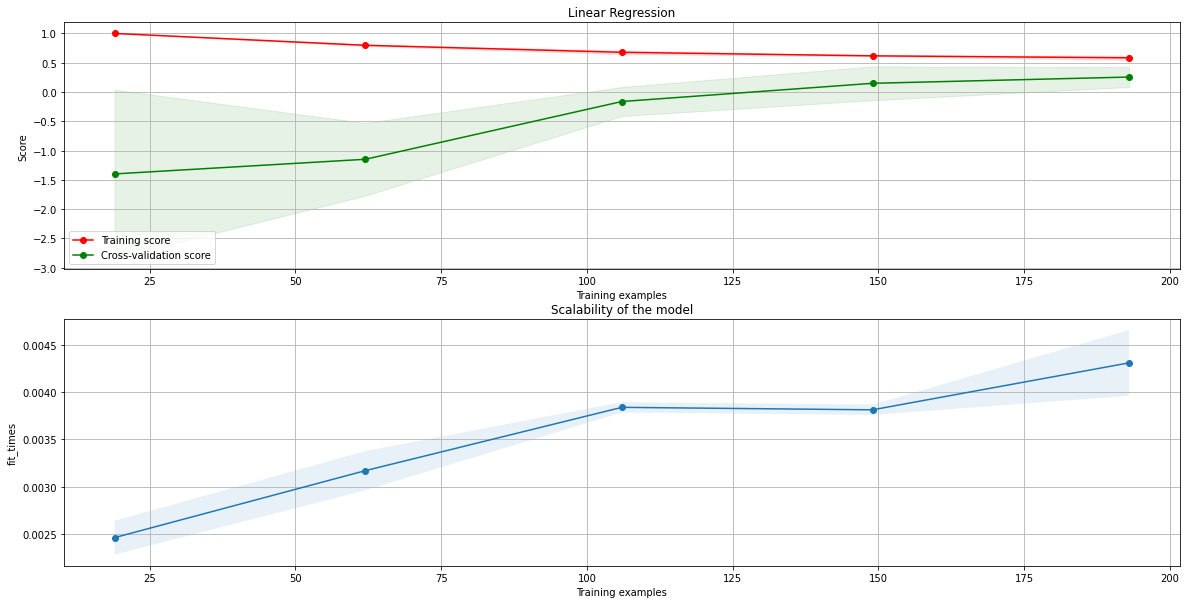

In [193]:
# Building learning curve of model
plot_learning_curve(linreg, "Linear Regression", train, target, cv=cv_train)

**5.2 Support Vector Machines**

Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. Reference https://en.wikipedia.org/wiki/Support_vector_machine.

In [194]:
# Support Vector Machines

svr = SVC()
svr_CV = GridSearchCV(svr, param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                                       'tol': [1e-3]}, 
                      cv=cv_train, verbose=False)
svr_CV.fit(train, target)
print(svr_CV.best_params_)
acc_metrics_calc(1,svr_CV,train,test,target,target_test)

{'kernel': 'rbf', 'tol': 0.001}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 0 1 0 1]
acc of r2_score for train = 61.61
acc of r2_score for test = 53.99
acc of acc for train = 90.5
acc of acc for test = 88.52
acc of rmse for train = 30.83
acc of rmse for test = 33.88
acc of re for train = 17.29
acc of re for test = 21.88


In [195]:
y_predict_4 = svr_CV.predict(test)

print(confusion_matrix(target_test , y_predict_4))
print(classification_report(target_test, y_predict_4))

[[27  2]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



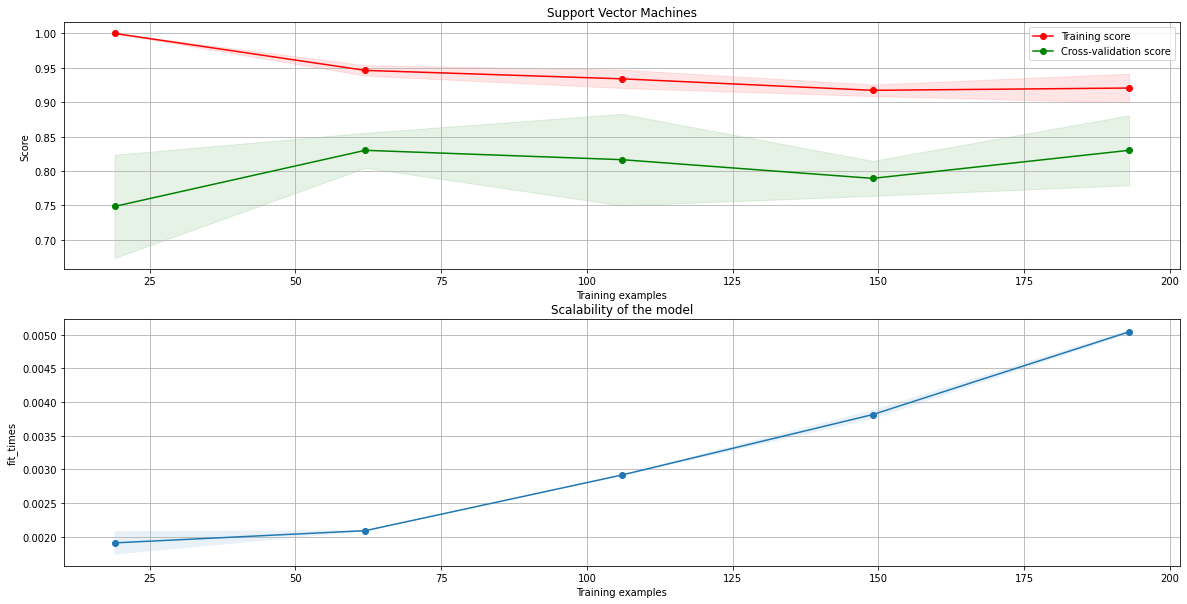

In [196]:
# Building learning curve of model
plot_learning_curve(svr, "Support Vector Machines", train, target, cv=cv_train)

**5.3 Linear SVC**

Linear SVC is a similar to SVM method. Its also builds on kernel functions but is appropriate for unsupervised learning. Reference https://en.wikipedia.org/wiki/Support-vector_machine#Support-vector_clustering_(svr

In [197]:
# Linear SVR

linear_svc = LinearSVC()
param_grid = {'dual':[False],
              'C': np.linspace(1, 15, 15)}
linear_svc_CV = GridSearchCV(linear_svc, param_grid=param_grid, cv=cv_train, verbose=False)
linear_svc_CV.fit(train, target)
print(linear_svc_CV.best_params_)
acc_metrics_calc(2,linear_svc_CV,train,test,target,target_test)


{'C': 1.0, 'dual': False}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 44.91
acc of r2_score for test = 47.41
acc of acc for train = 86.36
acc of acc for test = 86.89
acc of rmse for train = 36.93
acc of rmse for test = 36.21
acc of re for train = 24.81
acc of re for test = 25.0


In [198]:
y_predict_5 = linear_svc_CV.predict(test)

print(confusion_matrix(target_test , y_predict_5))
print(classification_report(target_test, y_predict_5))

[[26  3]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



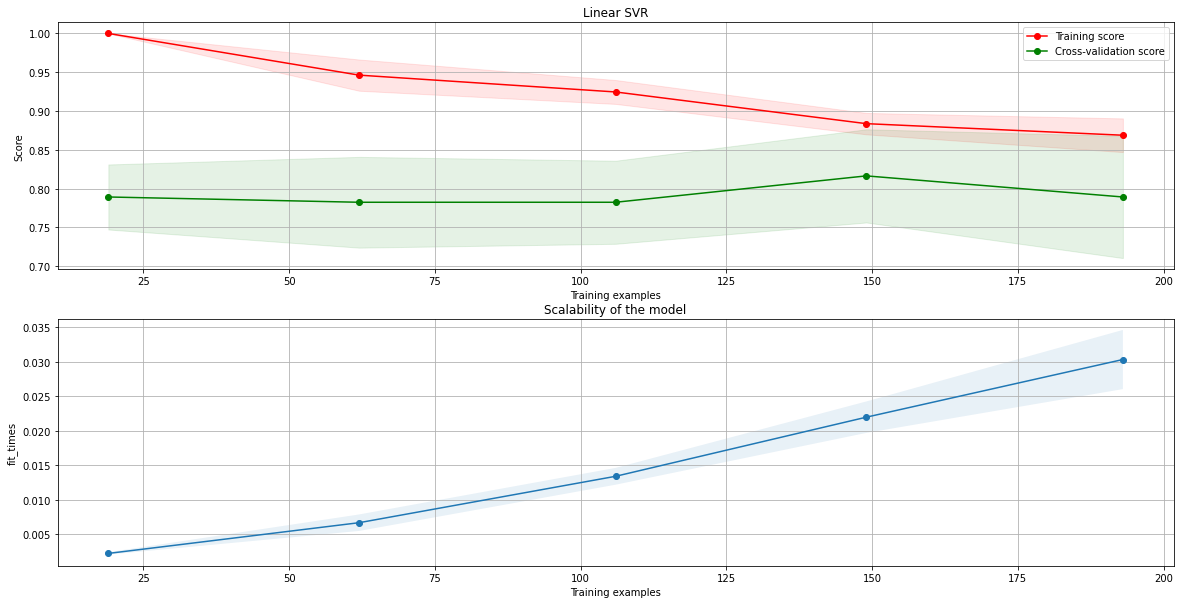

In [199]:
# Building learning curve of model
plot_learning_curve(linear_svc, "Linear SVR", train, target, cv=cv_train)

5.4 MLP Classifier

The MLPClassifier optimizes the squared-loss using LBFGS or stochastic gradient descent by the Multi-layer Perceptron regressor. Reference Sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor.

In [200]:
%%time
# MLPClassifier

mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [i for i in range(2,5)],
              'solver': ['sgd'],
              'learning_rate': ['adaptive'],
              'max_iter': [1000]
              }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=False)
mlp_GS.fit(train, target)
print(mlp_GS.best_params_)
acc_metrics_calc(3,mlp_GS,train,test,target,target_test)

{'hidden_layer_sizes': 3, 'learning_rate': 'adaptive', 'max_iter': 1000, 'solver': 'sgd'}
target =  [1 0 0 1 0]
ytrain =  [1 0 1 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 59.94
acc of r2_score for test = 34.27
acc of acc for train = 90.08
acc of acc for test = 83.61
acc of rmse for train = 31.49
acc of rmse for test = 40.49
acc of re for train = 18.05
acc of re for test = 31.25
CPU times: user 3.78 s, sys: 6.85 ms, total: 3.79 s
Wall time: 3.79 s


In [201]:
y_predict_6 = mlp_GS.predict(test)

print(confusion_matrix(target_test , y_predict_6))
print(classification_report(target_test, y_predict_6))

[[25  4]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



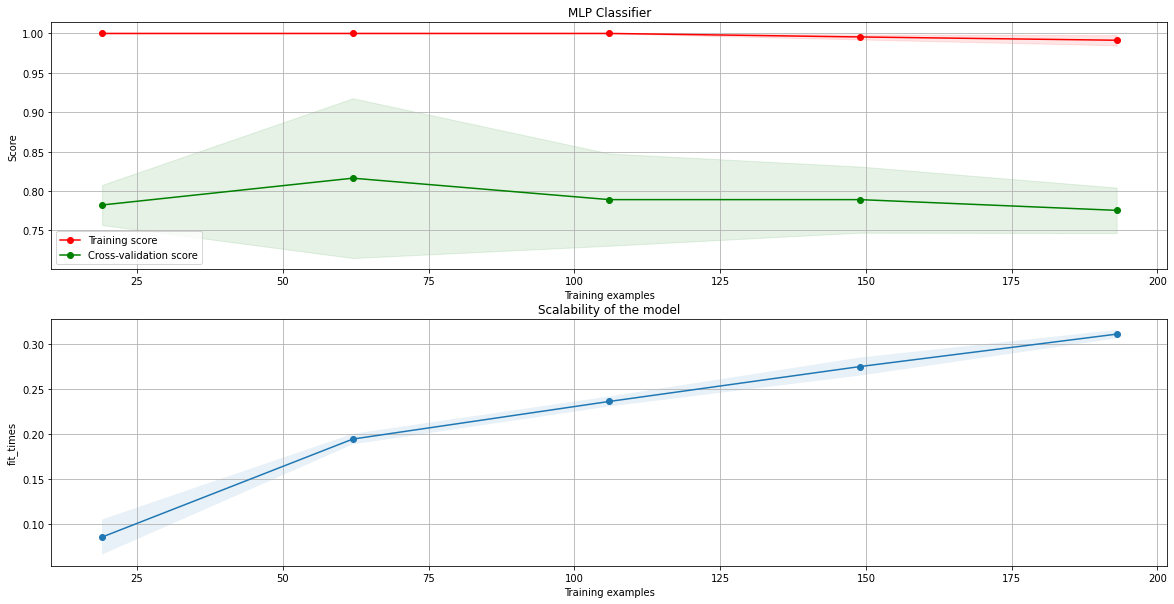

In [202]:
# Building learning curve of model
plot_learning_curve(mlp, "MLP Classifier", train, target, cv=cv_train)

**5.5 Stochastic Gradient Descent**

Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data). Especially in big data applications this reduces the computational burden, achieving faster iterations in trade for a slightly lower convergence rate. Reference Wikipedia: https://en.wikipedia.org/wiki/Stochastic_gradient_descent.

In [203]:
# Stochastic Gradient Descent

sgd = SGDClassifier(early_stopping=True)
param_grid = {'alpha': [0.035, 0.04, 0.45]}
sgd_CV = GridSearchCV(sgd, param_grid=param_grid, cv=cv_train, verbose=False)
sgd_CV.fit(train, target)
print(sgd_CV.best_params_)
acc_metrics_calc(4,sgd_CV,train,test,target,target_test)

{'alpha': 0.45}
target =  [1 0 0 1 0]
ytrain =  [1 0 1 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 34.9
acc of r2_score for test = 53.99
acc of acc for train = 83.88
acc of acc for test = 88.52
acc of rmse for train = 40.14
acc of rmse for test = 33.88
acc of re for train = 29.32
acc of re for test = 21.88


In [204]:
y_predict_7 = sgd_CV.predict(test)

print(confusion_matrix(target_test , y_predict_7))
print(classification_report(target_test, y_predict_7))

[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



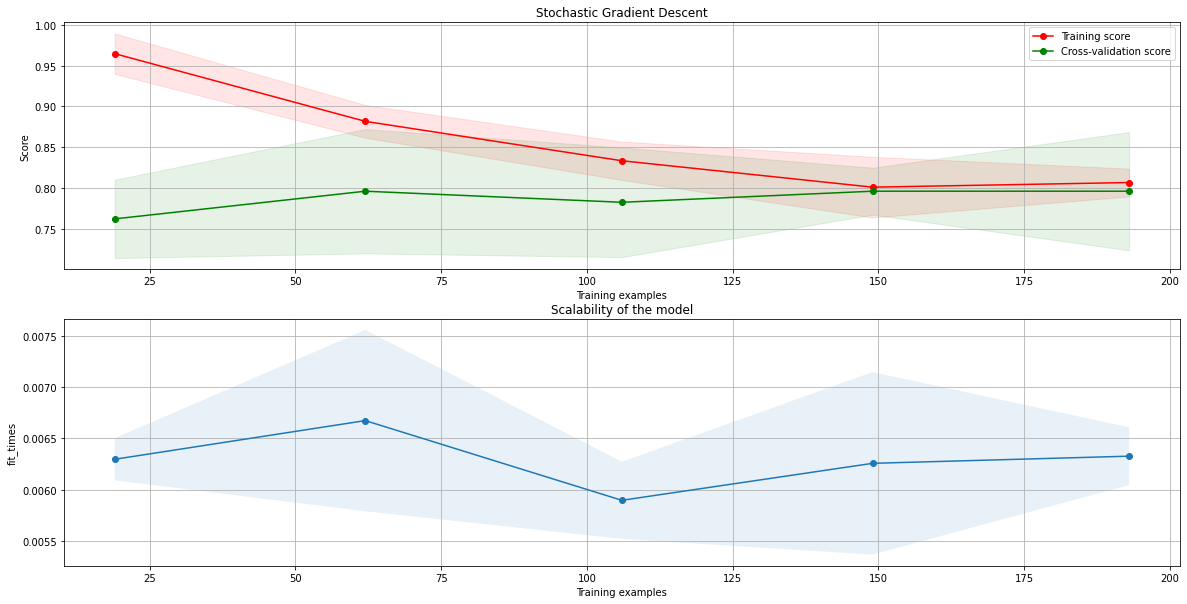

In [205]:
# Building learning curve of model
plot_learning_curve(sgd, "Stochastic Gradient Descent", train, target, cv=cv_train)

**5.6 Decision Tree Classifier**

This model uses a Decision Tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia: https://en.wikipedia.org/wiki/Decision_tree_learning.

In [206]:
# Decision Tree Classifier

decision_tree = DecisionTreeClassifier()
param_grid = {'min_samples_leaf': [i for i in range(2,10)]}
decision_tree_CV = GridSearchCV(decision_tree, param_grid=param_grid, cv=cv_train, verbose=False)
decision_tree_CV.fit(train, target)
print(decision_tree_CV.best_params_)
acc_metrics_calc(5,decision_tree_CV,train,test,target,target_test)

{'min_samples_leaf': 8}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 0 0 0 1]
acc of r2_score for train = 58.27
acc of r2_score for test = 14.55
acc of acc for train = 89.67
acc of acc for test = 78.69
acc of rmse for train = 32.14
acc of rmse for test = 46.16
acc of re for train = 18.8
acc of re for test = 40.62


In [207]:
y_predict_8 = decision_tree_CV.predict(test)

print(confusion_matrix(target_test , y_predict_8))
print(classification_report(target_test, y_predict_8))

[[25  4]
 [ 9 23]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.79        29
           1       0.85      0.72      0.78        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



In [208]:
# fit
#decision_tree.fit(train, target)

# predict
#y_predict = decision_tree.predict(test)

# f1 score
#score = f1_score(y_predict, target_test)

In [209]:
# print
#print("Decision Tree F1 score: {:.2f}".format(score))

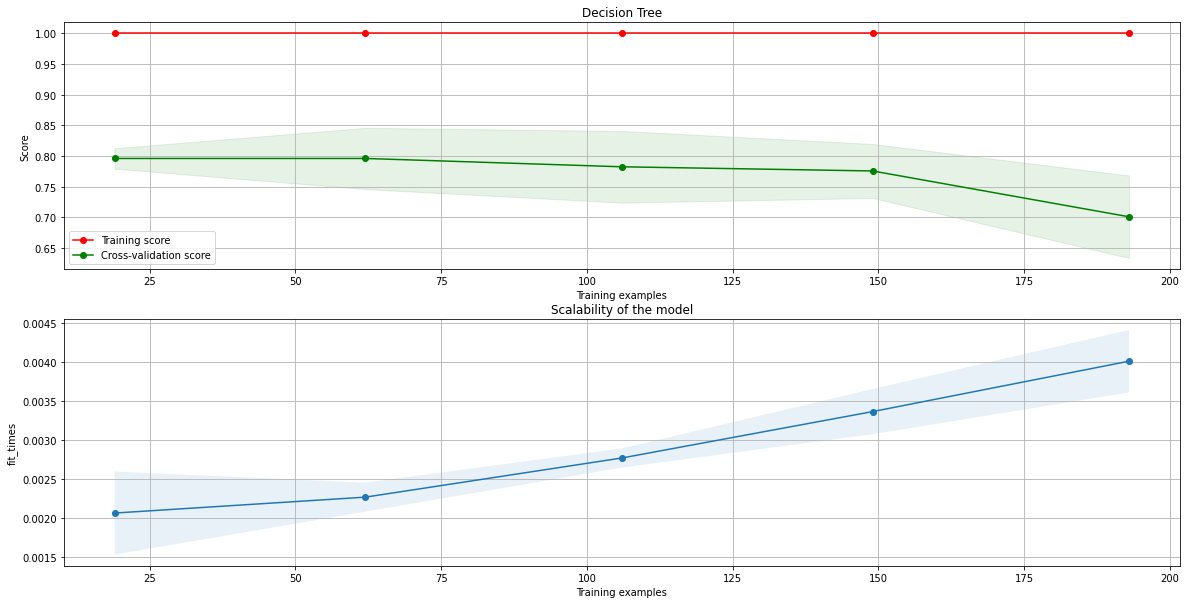

In [210]:
# Building learning curve of model
plot_learning_curve(decision_tree, "Decision Tree", train, target, cv=cv_train)

**5.7 Random Forest**

Random Forest is one of the most popular model. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators= [100, 300]) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Reference Wikipedia; https://en.wikipedia.org/wiki/Random_forest.

In [211]:
%%time
# Random Forest
# Parameters of model (param_grid) taken from the notebook https://www.kaggle.com/morenovanton/titanic-random-forest

random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [40, 50, 60], 'min_samples_split': [40, 50, 60, 70], 'min_samples_leaf': [12, 13, 14, 15, 16, 17], 
              'max_features': ['auto'], 'max_depth': [3, 4, 5, 6], 'criterion': ['gini'], 'bootstrap': [False]}
random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, 
                             cv=cv_train, verbose=False)
random_forest_CV.fit(train, target)
print(random_forest_CV.best_params_)
acc_metrics_calc(6,random_forest_CV,train,test,target,target_test)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 13, 'min_samples_split': 50, 'n_estimators': 40}
target =  [1 0 0 1 0]
ytrain =  [1 0 1 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 0 0 1]
acc of r2_score for train = 53.26
acc of r2_score for test = 27.69
acc of acc for train = 88.43
acc of acc for test = 81.97
acc of rmse for train = 34.02
acc of rmse for test = 42.47
acc of re for train = 21.05
acc of re for test = 34.38
CPU times: user 47.2 s, sys: 128 ms, total: 47.3 s
Wall time: 47.3 s


In [212]:
y_predict_9 = random_forest_CV.predict(test)

print(confusion_matrix(target_test , y_predict_9))
print(classification_report(target_test, y_predict_9))

[[24  5]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



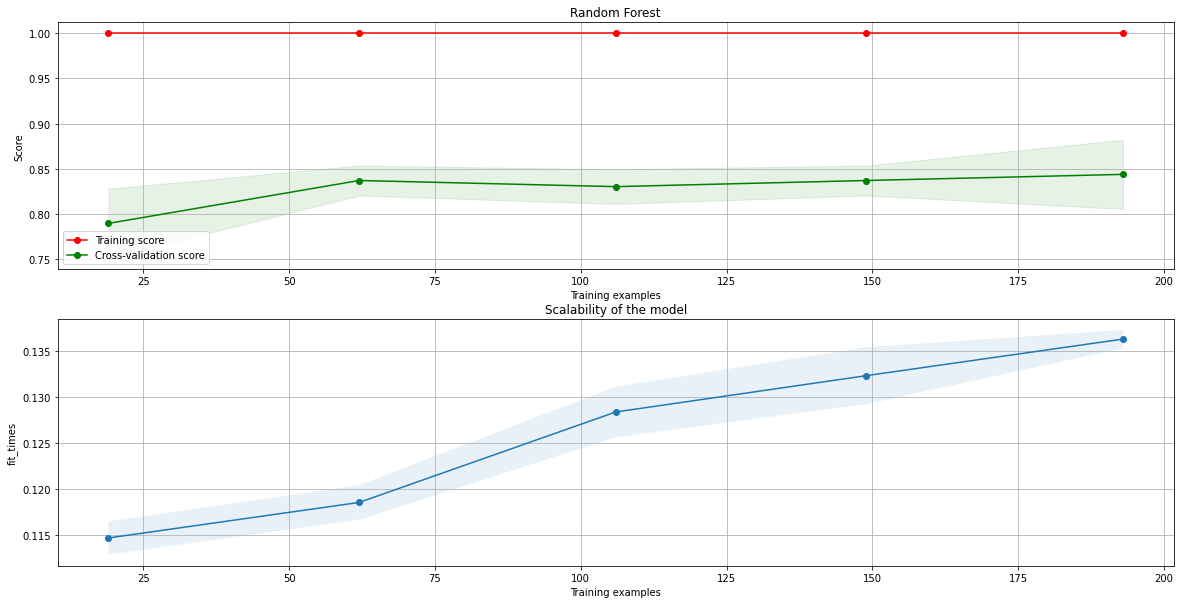

In [213]:
# Building learning curve of model
plot_learning_curve(random_forest, "Random Forest", train, target, cv=cv_train)

**5.8 XGB Classifier**

XGBoost is an ensemble tree method that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture. XGBoost improves upon the base Gradient Boosting Machines (GBM) framework through systems optimization and algorithmic enhancements. Reference Towards Data Science: https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d.

In [214]:
%%time
# XGBoost Classifier
xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
parameters = {'n_estimators': [50, 60, 70, 80, 90], 
              'learning_rate': [0.09, 0.1, 0.15, 0.2],
              'max_depth': [3, 4, 5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=cv_train).fit(trainb, targetb)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)
acc_metrics_calc(7,xgb_reg,trainb,testb,targetb,target_testb)

Best score: 0.830
Best parameters set: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 0 0 1]
acc of r2_score for train = 100.0
acc of r2_score for test = 7.97
acc of acc for train = 100.0
acc of acc for test = 77.05
acc of rmse for train = 0.0
acc of rmse for test = 47.91
acc of re for train = 0.0
acc of re for test = 43.75
CPU times: user 10.5 s, sys: 188 ms, total: 10.7 s
Wall time: 10.7 s


In [215]:
y_predict_10 = xgb_reg.predict(test)

print(confusion_matrix(target_test , y_predict_10))
print(classification_report(target_test, y_predict_10))

[[ 1 28]
 [ 0 32]]
              precision    recall  f1-score   support

           0       1.00      0.03      0.07        29
           1       0.53      1.00      0.70        32

    accuracy                           0.54        61
   macro avg       0.77      0.52      0.38        61
weighted avg       0.76      0.54      0.40        61



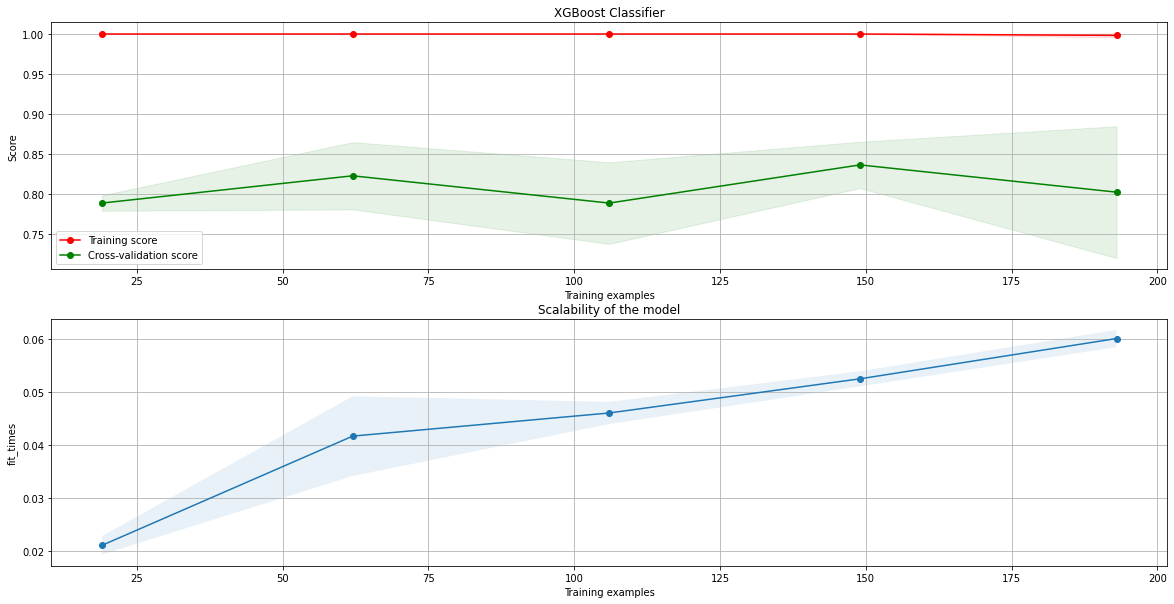

In [216]:
# Building learning curve of model
plot_learning_curve(xgb_clf, "XGBoost Classifier", trainb, targetb, cv=cv_train)

**5.9 LGBM Classifier**

Light GBM is a fast, distributed, high-performance gradient boosting framework based on decision tree algorithms. It splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’. Reference Analytics Vidhya: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/.

In [217]:
#%% split training set to validation set
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=test_train_split_part, random_state=random_state)
modelL = lgb.LGBMClassifier(n_estimators=1000, max_depth=6, num_leaves=30)
modelL.fit(Xtrain, Ztrain, eval_set=[(Xval, Zval)], early_stopping_rounds=50, verbose=True)

[1]	valid_0's binary_logloss: 0.667574
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's binary_logloss: 0.64063
[3]	valid_0's binary_logloss: 0.619707
[4]	valid_0's binary_logloss: 0.59973
[5]	valid_0's binary_logloss: 0.584819
[6]	valid_0's binary_logloss: 0.562111
[7]	valid_0's binary_logloss: 0.550468
[8]	valid_0's binary_logloss: 0.532355
[9]	valid_0's binary_logloss: 0.508861
[10]	valid_0's binary_logloss: 0.512174
[11]	valid_0's binary_logloss: 0.496612
[12]	valid_0's binary_logloss: 0.496821
[13]	valid_0's binary_logloss: 0.483422
[14]	valid_0's binary_logloss: 0.474379
[15]	valid_0's binary_logloss: 0.46352
[16]	valid_0's binary_logloss: 0.461193
[17]	valid_0's binary_logloss: 0.444769
[18]	valid_0's binary_logloss: 0.440382
[19]	valid_0's binary_logloss: 0.43679
[20]	valid_0's binary_logloss: 0.422578
[21]	valid_0's binary_logloss: 0.417101
[22]	valid_0's binary_logloss: 0.41439
[23]	valid_0's binary_logloss: 0.406231
[24]	valid_0's binary_logloss: 0

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=6,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=1000, n_jobs=-1, num_leaves=30, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [218]:
acc_metrics_calc(8,modelL,trainb,testb,targetb,target_testb)

target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 79.97
acc of r2_score for test = 21.12
acc of acc for train = 95.04
acc of acc for test = 80.33
acc of rmse for train = 22.27
acc of rmse for test = 44.35
acc of re for train = 9.02
acc of re for test = 37.5


In [219]:
y_predict_11 = modelL.predict(Xval)

print(confusion_matrix(Zval , y_predict_11))
print(classification_report(Zval, y_predict_11))

[[21  4]
 [ 4 20]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.83      0.83      0.83        24

    accuracy                           0.84        49
   macro avg       0.84      0.84      0.84        49
weighted avg       0.84      0.84      0.84        49



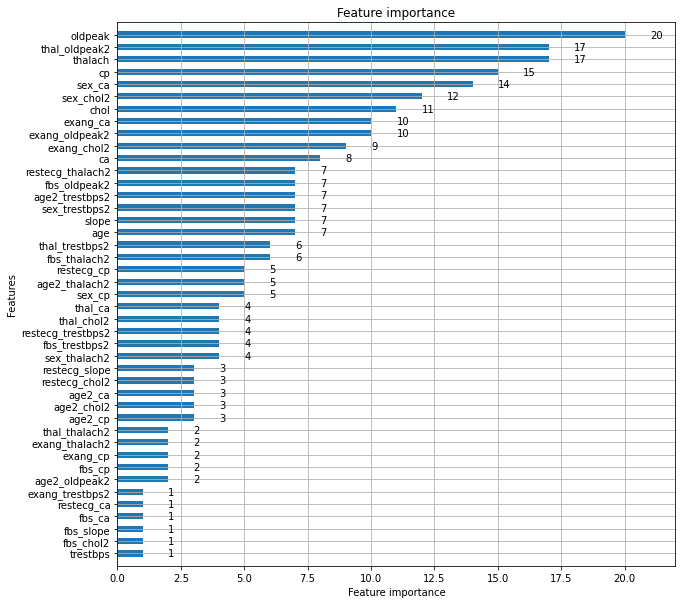

In [220]:
fig =  plt.figure(figsize = (10,10))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()

**5.10 Gradient Boosting Classifier**

Gradient Boosting builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage nclasses regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced. The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data and max_features=n_features, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed. Reference sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [221]:
# Gradient Boosting Classifier

gradient_boosting = GradientBoostingClassifier()
param_grid = {'learning_rate' : [0.05, 0.06, 0.07, 0.08, 0.09],
              'max_depth': [i for i in range(2,5)],
              'min_samples_leaf': [i for i in range(3,10)]}
gradient_boosting_CV = GridSearchCV(estimator=gradient_boosting, param_grid=param_grid, 
                                    cv=cv_train, verbose=False)
gradient_boosting_CV.fit(train, target)
print(gradient_boosting_CV.best_params_)
acc_metrics_calc(9,gradient_boosting_CV,train,test,target,target_test)

{'learning_rate': 0.06, 'max_depth': 2, 'min_samples_leaf': 7}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 83.31
acc of r2_score for test = 27.69
acc of acc for train = 95.87
acc of acc for test = 81.97
acc of rmse for train = 20.33
acc of rmse for test = 42.47
acc of re for train = 7.52
acc of re for test = 34.38


In [222]:
y_predict_12 = gradient_boosting_CV.predict(test)

print(confusion_matrix(target_test , y_predict_12))
print(classification_report(target_test, y_predict_12))

[[24  5]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



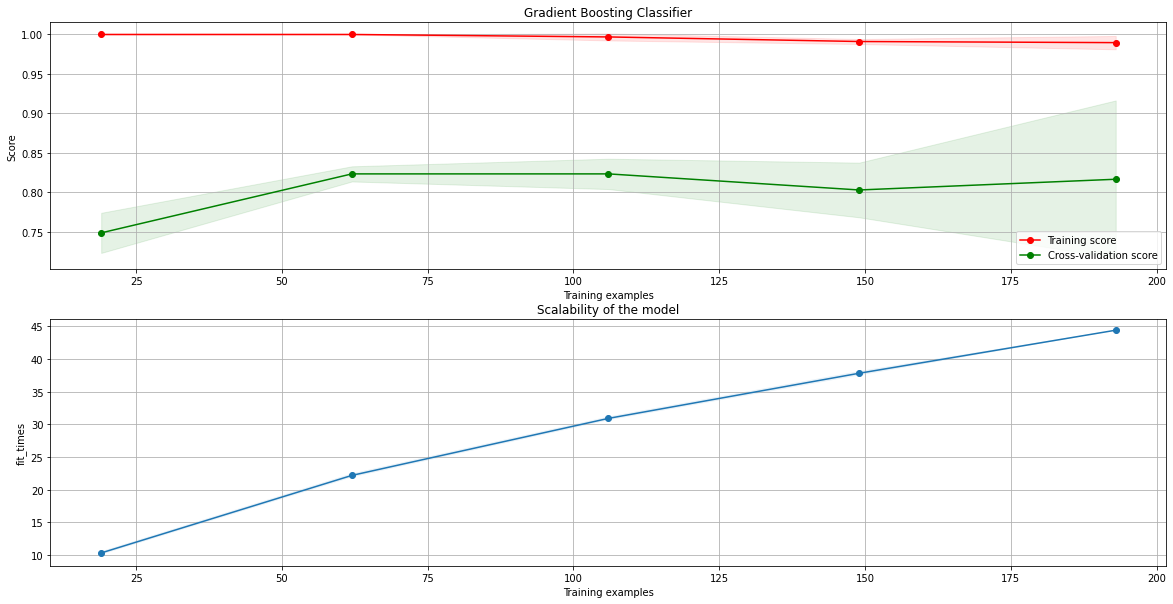

In [223]:
# Building learning curve of model
plot_learning_curve(gradient_boosting_CV, "Gradient Boosting Classifier", train, target, cv=cv_train)

**5.11 Ridge Classifier**

Tikhonov Regularization, colloquially known as Ridge Classifier, is the most commonly used regression algorithm to approximate an answer for an equation with no unique solution. This type of problem is very common in machine learning tasks, where the "best" solution must be chosen using limited data. If a unique solution exists, algorithm will return the optimal value. However, if multiple solutions exist, it may choose any of them. Reference Brilliant.org: https://brilliant.org/wiki/ridge-regression/.

In [224]:
# Ridge Classifier

ridge = RidgeClassifier()
ridge_CV = GridSearchCV(estimator=ridge, param_grid={'alpha': np.linspace(.1, 1.5, 15)}, cv=cv_train, verbose=False)
ridge_CV.fit(train, target)
print(ridge_CV.best_params_)
acc_metrics_calc(10,ridge_CV,train,test,target,target_test)

{'alpha': 0.6}
target =  [1 0 0 1 0]
ytrain =  [1 0 1 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 43.24
acc of r2_score for test = 47.41
acc of acc for train = 85.95
acc of acc for test = 86.89
acc of rmse for train = 37.48
acc of rmse for test = 36.21
acc of re for train = 25.56
acc of re for test = 25.0


In [225]:
y_predict_13 = ridge_CV.predict(test)

print(confusion_matrix(target_test , y_predict_13))
print(classification_report(target_test, y_predict_13))

[[25  4]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



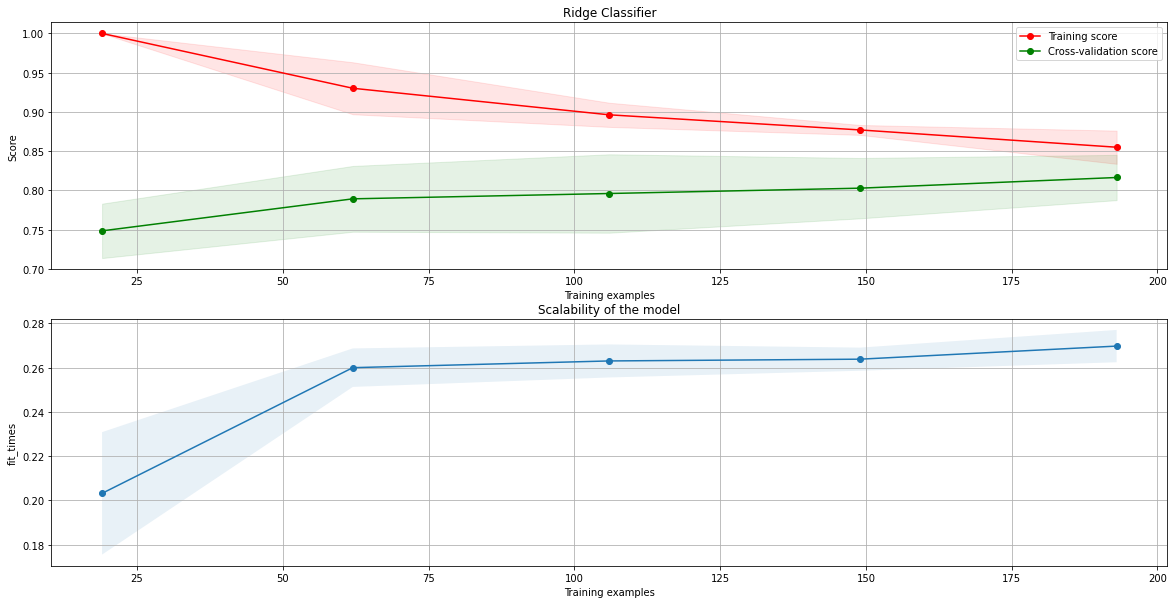

In [226]:
# Building learning curve of model
plot_learning_curve(ridge_CV, "Ridge Classifier", train, target, cv=cv_train)

**5.12 BaggingClassifier**

Bootstrap aggregating, also called Bagging, is a machine learning ensemble meta-algorithm designed to improve the stability and accuracy of machine learning algorithms used in statistical classification and regression. It also reduces variance and helps to avoid overfitting. Although it is usually applied to decision tree methods, it can be used with any type of method. Bagging is a special case of the model averaging approach. Bagging leads to "improvements for unstable procedures", which include, for example, artificial neural networks, classification and regression trees, and subset selection in linear regression. On the other hand, it can mildly degrade the performance of stable methods such as K-nearest neighbors. Reference Wikipedia: https://en.wikipedia.org/wiki/Bootstrap_aggregating

In [227]:
# Bagging Classifier

bagging = BaggingClassifier()
param_grid={'max_features': [0.85, 0.9, 0.95],
            'n_estimators': [3, 4, 5],
            'warm_start' : [False],
            'random_state': [random_state]}
bagging_CV = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=cv_train, verbose=False)
bagging_CV.fit(train, target)
print(bagging_CV.best_params_)
acc_metrics_calc(11,bagging_CV,train,test,target,target_test)

{'max_features': 0.85, 'n_estimators': 4, 'random_state': 42, 'warm_start': False}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 0 1 0 1]
acc of r2_score for train = 74.96
acc of r2_score for test = -11.75
acc of acc for train = 93.8
acc of acc for test = 72.13
acc of rmse for train = 24.9
acc of rmse for test = 52.79
acc of re for train = 11.28
acc of re for test = 53.12


In [228]:
y_predict_14 = bagging_CV.predict(test)

print(confusion_matrix(target_test , y_predict_14))
print(classification_report(target_test, y_predict_14))

[[26  3]
 [14 18]]
              precision    recall  f1-score   support

           0       0.65      0.90      0.75        29
           1       0.86      0.56      0.68        32

    accuracy                           0.72        61
   macro avg       0.75      0.73      0.72        61
weighted avg       0.76      0.72      0.71        61



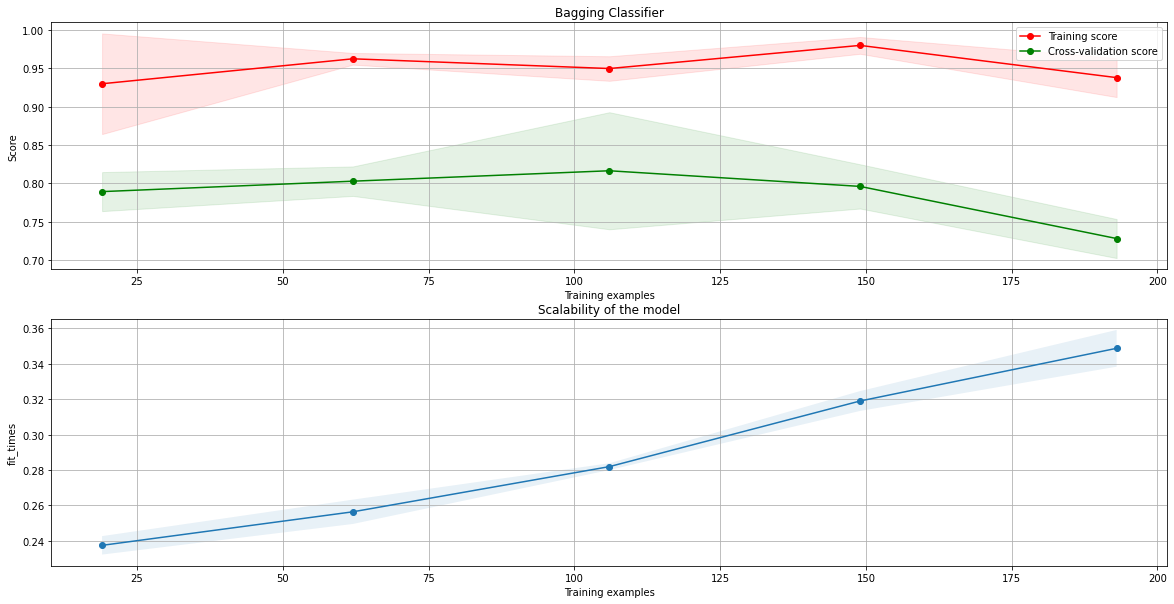

In [229]:
# Building learning curve of model
plot_learning_curve(bagging_CV, "Bagging Classifier", train, target, cv=cv_train)

**5.13 Extra Trees Classifier**

ExtraTreesClassifier implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values. Reference sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

In extremely randomized trees, randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias. Reference sklearn documentation: https://scikit-learn.org/stable/modules/ensemble.html#Extremely%20Randomized%20Trees

In [230]:
# Extra Trees Classifier

etr = ExtraTreesClassifier()
etr_CV = GridSearchCV(estimator=etr, param_grid={'min_samples_leaf' : [11, 12, 13, 14]}, cv=cv_train, verbose=False)
etr_CV.fit(train, target)
print(etr_CV.best_params_)
acc_metrics_calc(12,etr_CV,train,test,target,target_test)

{'min_samples_leaf': 14}
target =  [1 0 0 1 0]
ytrain =  [1 0 1 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 43.24
acc of r2_score for test = 40.84
acc of acc for train = 85.95
acc of acc for test = 85.25
acc of rmse for train = 37.48
acc of rmse for test = 38.41
acc of re for train = 25.56
acc of re for test = 28.12


In [231]:
y_predict_15 = etr_CV.predict(test)

print(confusion_matrix(target_test , y_predict_15))
print(classification_report(target_test, y_predict_15))

[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



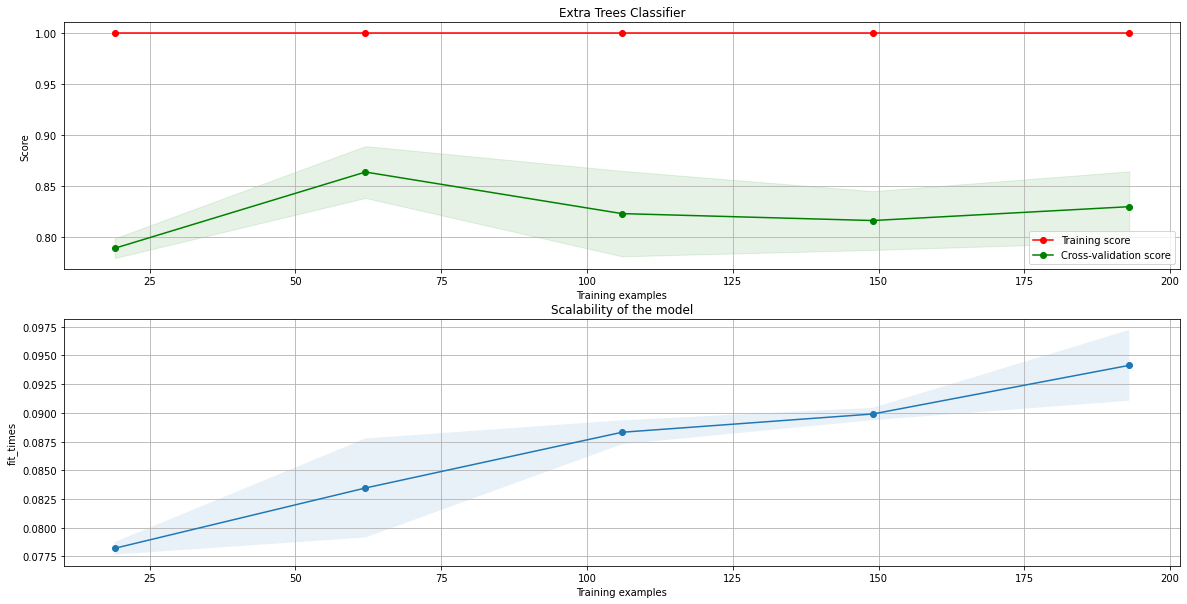

In [232]:
# Building learning curve of model
plot_learning_curve(etr, "Extra Trees Classifier", train, target, cv=cv_train)

**5.14 AdaBoost Classifier**

The core principle of AdaBoost ("Adaptive Boosting") is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of them are then combined through a weighted majority vote (or sum) to produce the final prediction. The data modifications at each so-called boosting iteration consist of applying N weights to each of the training samples. Initially, those weights are all set to 1/N, so that the first step simply trains a weak learner on the original data. For each successive iteration, the sample weights are individually modified and the learning algorithm is reapplied to the reweighted data. At a given step, those training examples that were incorrectly predicted by the boosted model induced at the previous step have their weights increased, whereas the weights are decreased for those that were predicted correctly. As iterations proceed, examples that are difficult to predict receive ever-increasing influence. Each subsequent weak learner is thereby forced to concentrate on the examples that are missed by the previous ones in the sequence. Reference sklearn documentation: https://scikit-learn.org/stable/modules/ensemble.html#adaboost


In [233]:
# AdaBoost Classifier

Ada_Boost = AdaBoostClassifier()
Ada_Boost_CV = GridSearchCV(estimator=Ada_Boost, param_grid={'learning_rate' : [0.095, 0.1, 0.101, 0.102, 0.105]}, cv=cv_train, verbose=False)
Ada_Boost_CV.fit(train, target)
print(Ada_Boost_CV.best_params_)
acc_metrics_calc(13,Ada_Boost_CV,train,test,target,target_test)

{'learning_rate': 0.105}
target =  [1 0 0 1 0]
ytrain =  [1 0 1 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 0 0 1]
acc of r2_score for train = 51.59
acc of r2_score for test = 14.55
acc of acc for train = 88.02
acc of acc for test = 78.69
acc of rmse for train = 34.62
acc of rmse for test = 46.16
acc of re for train = 21.8
acc of re for test = 40.62


In [234]:
y_predict_16 = Ada_Boost_CV.predict(test)

print(confusion_matrix(target_test , y_predict_16))
print(classification_report(target_test, y_predict_16))

[[24  5]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



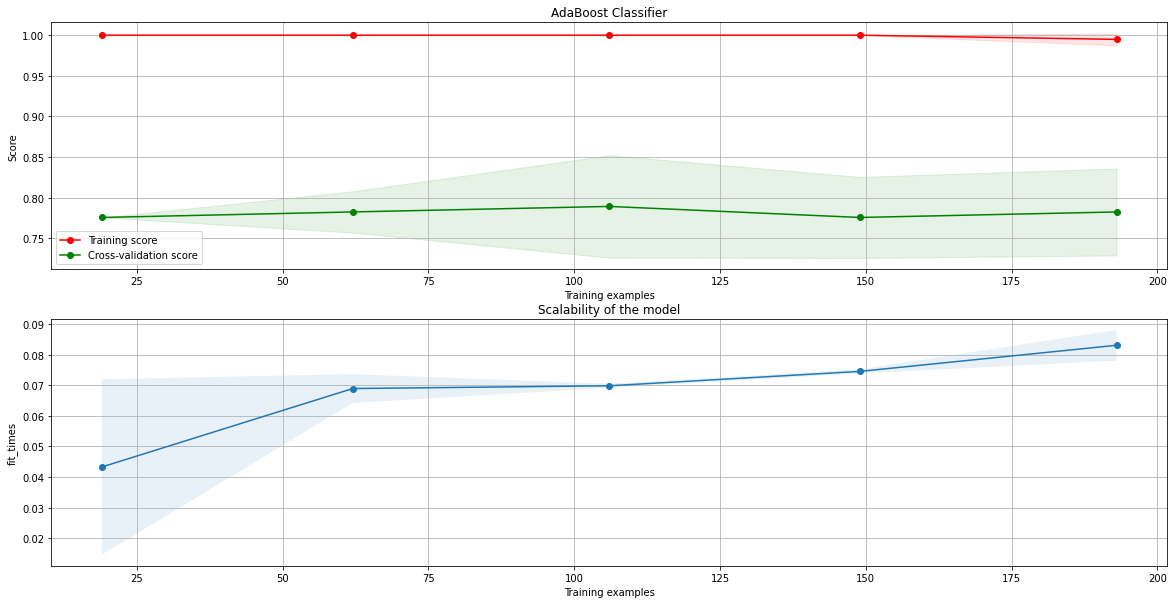

In [235]:
# Building learning curve of model
plot_learning_curve(Ada_Boost, "AdaBoost Classifier", train, target, cv=cv_train)

**5.15 Logistic Regression**

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia: https://en.wikipedia.org/wiki/Logistic_regression

In [236]:
# Logistic Regression

logreg = LogisticRegression()
logreg_CV = GridSearchCV(estimator=logreg, param_grid={'C' : [.2, .3, .4]}, cv=cv_train, verbose=False)
logreg_CV.fit(train, target)
print(logreg_CV.best_params_)
acc_metrics_calc(14,logreg_CV,train,test,target,target_test)

{'C': 0.2}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 46.58
acc of r2_score for test = 47.41
acc of acc for train = 86.78
acc of acc for test = 86.89
acc of rmse for train = 36.36
acc of rmse for test = 36.21
acc of re for train = 24.06
acc of re for test = 25.0


In [237]:
y_predict_17 = logreg_CV.predict(test)

print(confusion_matrix(target_test , y_predict_17))
print(classification_report(target_test, y_predict_17))

[[25  4]
 [ 4 28]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



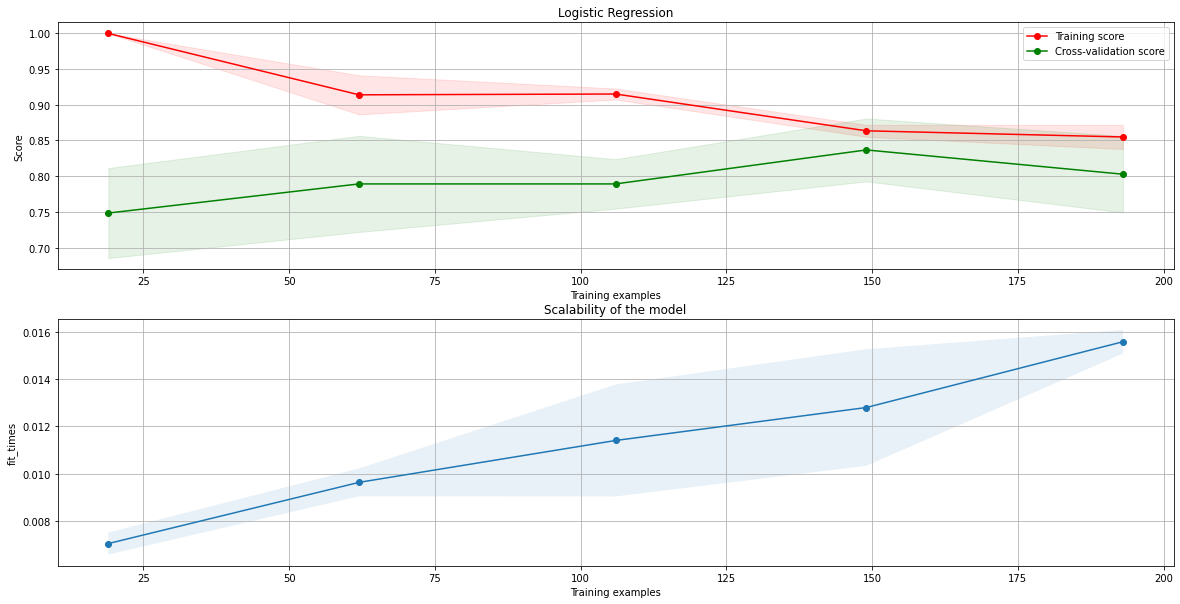

In [238]:
# Building learning curve of model
plot_learning_curve(logreg, "Logistic Regression", train, target, cv=cv_train)

**5.16 k-Nearest Neighbors (KNN)**

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). Reference Wikipedia: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [239]:
# KNN - k-Nearest Neighbors algorithm

knn = KNeighborsClassifier()
knn_CV = GridSearchCV(estimator=knn, param_grid={'n_neighbors': range(2, 7)}, 
                      cv=cv_train, verbose=False).fit(train, target)
print(knn_CV.best_params_)
acc_metrics_calc(15,knn_CV,train,test,target,target_test)

{'n_neighbors': 3}
target =  [1 0 0 1 0]
ytrain =  [1 0 1 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 56.6
acc of r2_score for test = 34.27
acc of acc for train = 89.26
acc of acc for test = 83.61
acc of rmse for train = 32.78
acc of rmse for test = 40.49
acc of re for train = 19.55
acc of re for test = 31.25


In [240]:
y_predict_18 = knn_CV.predict(test)

print(confusion_matrix(target_test , y_predict_18))
print(classification_report(target_test, y_predict_18))

[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



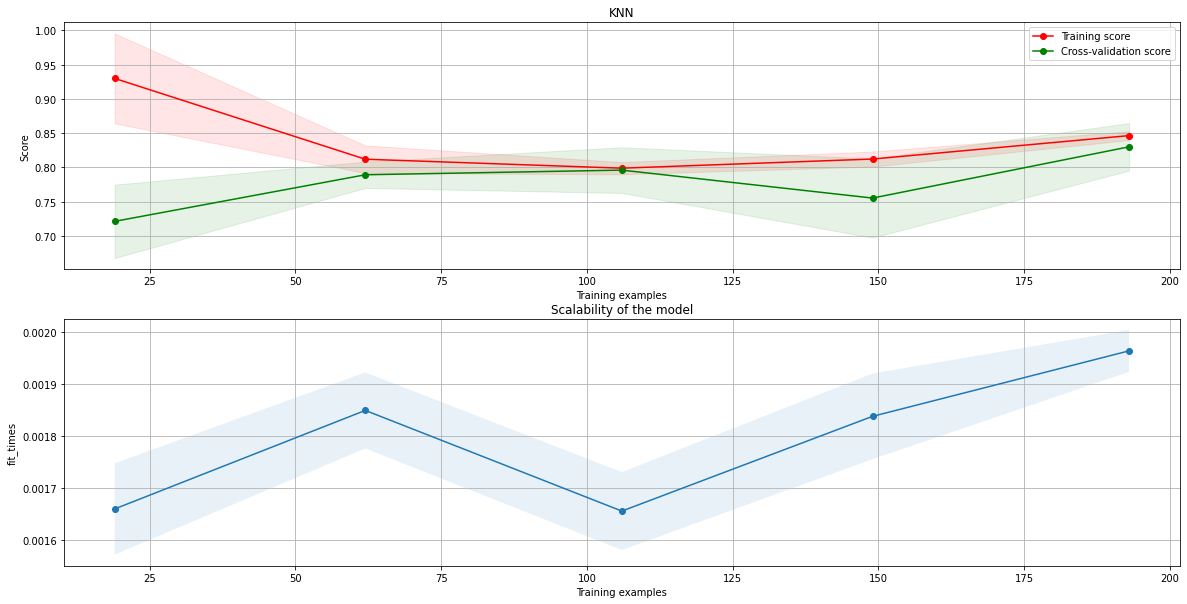

In [241]:
# Building learning curve of model
plot_learning_curve(knn, "KNN", train, target, cv=cv_train)

**5.17 Naive Bayes**

In machine learning, Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem. Reference Wikipedia: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [242]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
param_grid={'var_smoothing': [1e-4, 1e-5, 1e-6]}
gaussian_CV = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=cv_train, verbose=False)
gaussian_CV.fit(train, target)
print(gaussian_CV.best_params_)
acc_metrics_calc(16,gaussian_CV,train,test,target,target_test)

{'var_smoothing': 0.0001}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 0 0 0 1]
acc of r2_score for train = 24.88
acc of r2_score for test = 34.27
acc of acc for train = 81.4
acc of acc for test = 83.61
acc of rmse for train = 43.12
acc of rmse for test = 40.49
acc of re for train = 33.83
acc of re for test = 31.25


In [243]:
y_predict_19 = gaussian_CV.predict(test)

print(confusion_matrix(target_test , y_predict_19))
print(classification_report(target_test, y_predict_19))

[[27  2]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        29
           1       0.92      0.75      0.83        32

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



In [244]:
# fit
#gaussian.fit(train, target)

# predict
#y_predict_2 = gaussian.predict(test)

# f1 score
#score_2 = f1_score(y_predict_2, target_test)

# print
#print("GaussianNB F1 score: {: .2f}".format(score_2))

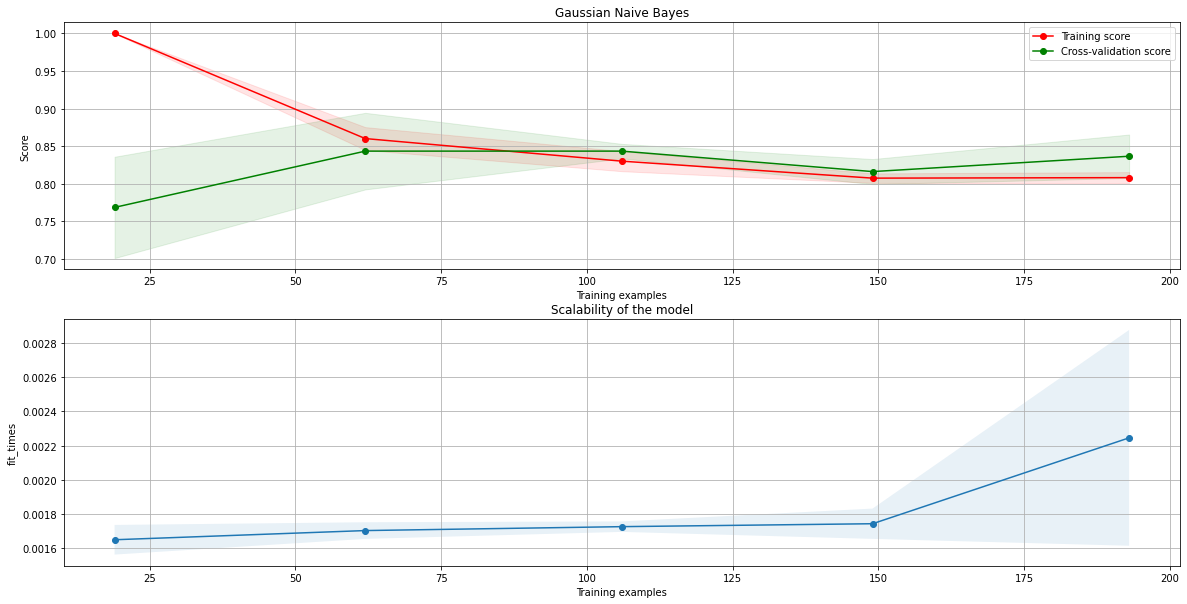

In [245]:
# Building learning curve of model
plot_learning_curve(gaussian, "Gaussian Naive Bayes", train, target, cv=cv_train)

**5.18 Neural network (NN) with Keras**

In [246]:
def build_nn(optimizer='adam'):

    # Initializing the NN
    nn = Sequential()

    # Adding the input layer and the first hidden layer of the NN
    nn.add(Dense(units=32, kernel_initializer='he_normal', activation='relu', input_shape=(len(train0.columns),)))
    # Adding the output layer
    nn.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

    # Compiling the NN
    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return nn

Xtrain, Xval, Ztrain, Zval = train_test_split(train, target, test_size=test_train_split_part, random_state=random_state)
nn_model = build_nn(optimizers.Adam(lr=0.001))
nn_model.fit(Xtrain, Ztrain, batch_size=16, epochs=200, validation_data=(Xval, Zval))
acc_metrics_calc(17,nn_model,train,test,target,target_test)

Epoch 1/200
13/13 [==============================] - 0s 13ms/step - loss: 0.6325 - accuracy: 0.6166 - val_loss: 0.5585 - val_accuracy: 0.7347
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7617 - val_loss: 0.4822 - val_accuracy: 0.7551
Epoch 3/200
13/13 [==============================] - 0s 4ms/step - loss: 0.4467 - accuracy: 0.8083 - val_loss: 0.4438 - val_accuracy: 0.7551
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8187 - val_loss: 0.4295 - val_accuracy: 0.7959
Epoch 5/200
13/13 [==============================] - 0s 4ms/step - loss: 0.3840 - accuracy: 0.8187 - val_loss: 0.4209 - val_accuracy: 0.7959
Epoch 6/200
13/13 [==============================] - 0s 4ms/step - loss: 0.3631 - accuracy: 0.8187 - val_loss: 0.4236 - val_accuracy: 0.8163
Epoch 7/200
13/13 [==============================] - 0s 4ms/step - loss: 0.3459 - accuracy: 0.8290 - val_loss: 0.4188 - val_accuracy: 0.8367
Epoch 8/200


  **5.19 Gaussian Process Classification**

The GaussianProcessClassifier implements Gaussian processes (GP) for classification purposes, more specifically for probabilistic classification, where test predictions take the form of class probabilities. GaussianProcessClassifier places a GP prior on a latent function, which is then squashed through a link function to obtain the probabilistic classification. The latent function is a so-called nuisance function, whose values are not observed and are not relevant by themselves. Its purpose is to allow a convenient formulation of the model. GaussianProcessClassifier implements the logistic link function, for which the integral cannot be computed analytically but is easily approximated in the binary case.

In contrast to the regression setting, the posterior of the latent function is not Gaussian even for a GP prior since a Gaussian likelihood is inappropriate for discrete class labels. Rather, a non-Gaussian likelihood corresponding to the logistic link function (logit) is used. GaussianProcessClassifier approximates the non-Gaussian posterior with a Gaussian based on the Laplace approximation. Reference Sklearn documentation: https://scikit-learn.org/stable/modules/gaussian_process.html#gaussian-process-classification-gpc

In [247]:
# Gaussian Process Classification

gpc = GaussianProcessClassifier()
param_grid = {'max_iter_predict': [70, 80, 90],
              'warm_start': [False],
              'n_restarts_optimizer': range(2,4)}
gpc_CV = GridSearchCV(estimator=gpc, param_grid=param_grid, cv=cv_train, verbose=False)
gpc_CV.fit(train, target)
print(gpc_CV.best_params_)
acc_metrics_calc(18,gpc_CV,train,test,target,target_test)

{'max_iter_predict': 70, 'n_restarts_optimizer': 2, 'warm_start': False}
target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 100.0
acc of r2_score for test = 21.12
acc of acc for train = 100.0
acc of acc for test = 80.33
acc of rmse for train = 0.0
acc of rmse for test = 44.35
acc of re for train = 0.0
acc of re for test = 37.5


In [248]:
y_predict_20 = gpc_CV.predict(test)

print(confusion_matrix(target_test , y_predict_20))
print(classification_report(target_test, y_predict_20))

[[23  6]
 [ 6 26]]
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



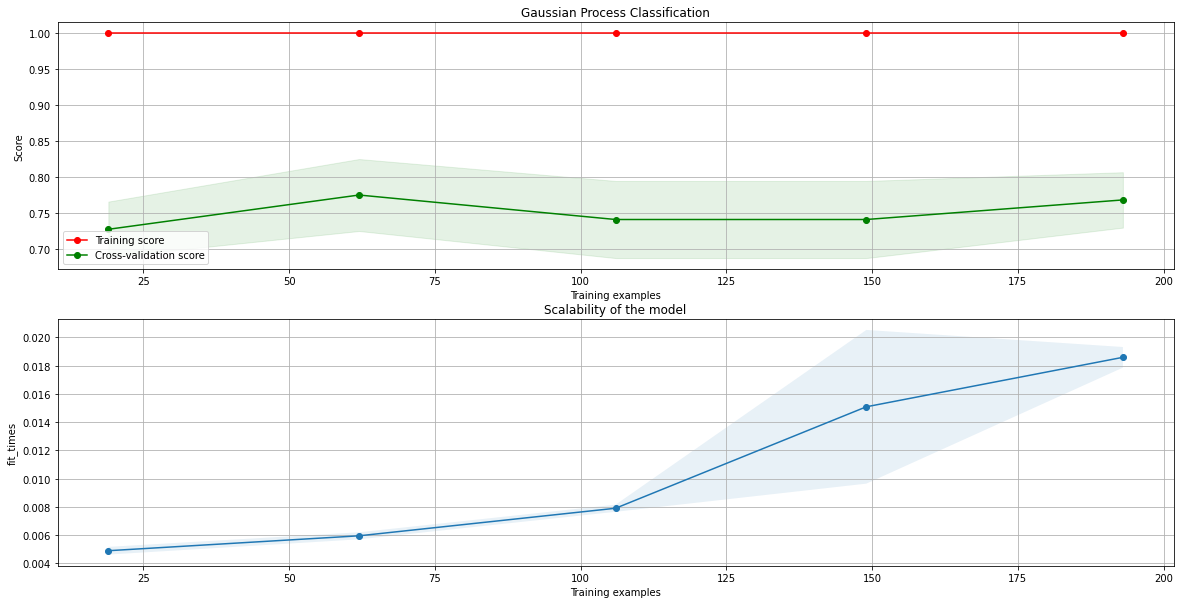

In [249]:
# Building learning curve of model
plot_learning_curve(gpc, "Gaussian Process Classification", train, target, cv=cv_train)

**5.20 Voting Classifier**

There is VotingClassifier. The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote (hard vote) or the average predicted probabilities (soft vote) to predict the class labels. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses. Reference sklearn documentation: https://scikit-learn.org/stable/modules/ensemble.html#voting-classifier

In [250]:
# Voting Classifier

Voting_ens = VotingClassifier(estimators=[('log', logreg_CV), ('mlp', mlp_GS ), ('svc', linear_svc_CV)])
Voting_ens.fit(train, target)
acc_metrics_calc(19,Voting_ens,train,test,target,target_test)

target =  [1 0 0 1 0]
ytrain =  [1 0 0 1 0]
target_test = [0 0 1 0 1]
ytest = [0 1 1 0 1]
acc of r2_score for train = 44.91
acc of r2_score for test = 53.99
acc of acc for train = 86.36
acc of acc for test = 88.52
acc of rmse for train = 36.93
acc of rmse for test = 33.88
acc of re for train = 24.81
acc of re for test = 21.88


In [251]:
y_predict_21 = Voting_ens.predict(test)

print(confusion_matrix(target_test , y_predict_21))
print(classification_report(target_test, y_predict_21))

[[25  4]
 [ 3 29]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# **6. Models evaluation**

We can now rank our evaluation of all the models to choose the best one for our problem.

In [252]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Support Vector Machines', 'Linear SVC', 
              'MLPClassifier', 'Stochastic Gradient Decent', 
              'Decision Tree Classifier', 'Random Forest',  'XGBClassifier', 'LGBMClassifier',
              'GradientBoostingClassifier', 'RidgeClassifier', 'BaggingClassifier', 'ExtraTreesClassifier', 
              'AdaBoostClassifier', 'Logistic Regression',
              'KNN', 'Naive Bayes', 'NN_model', 'Gaussian Process Classification',
              'VotingClassifier']})

In [253]:
for x in metrics_now:
    xs = metrics_all[x]
    models[xs + '_train'] = acc_all[(x-1)*2]
    models[xs + '_test'] = acc_all[(x-1)*2+1]
    if xs == "acc":
        models[xs + '_diff'] = models[xs + '_train'] - models[xs + '_test']
#models

In [254]:
print('Prediction accuracy for models')
ms = metrics_all[metrics_now[1]] # the first from metrics
models[['Model', ms + '_train', ms + '_test', 'acc_diff']].sort_values(by=[(ms + '_test'), (ms + '_train')], ascending=False)

Prediction accuracy for models


,Model,acc_train,acc_test,acc_diff
1,Support Vector Machines,90.50,88.52,1.98
19,VotingClassifier,86.36,88.52,-2.16
4,Stochastic Gradient Decent,83.88,88.52,-4.64
14,Logistic Regression,86.78,86.89,-0.11
2,Linear SVC,86.36,86.89,-0.53
10,RidgeClassifier,85.95,86.89,-0.94
12,ExtraTreesClassifier,85.95,85.25,0.70
3,MLPClassifier,90.08,83.61,6.47
15,KNN,89.26,83.61,5.65
16,Naive Bayes,81.40,83.61,-2.21


In [255]:
pd.options.display.float_format = '{:,.2f}'.format

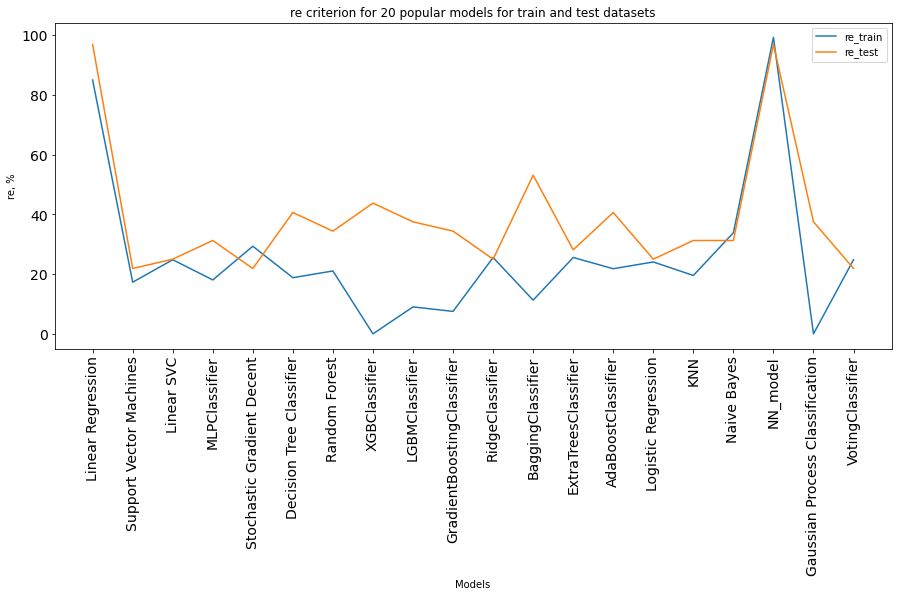

In [256]:
    # Plot
    xs = metrics_all[x]
    xs_train = metrics_all[x] + '_train'
    xs_test = metrics_all[x] + '_test'
    plt.figure(figsize=[15,6])
    xx = models['Model']
    plt.tick_params(labelsize=14)
    plt.plot(xx, models[xs_train], label = xs_train)
    plt.plot(xx, models[xs_test], label = xs_test)
    plt.legend()
    plt.title(str(xs) + ' criterion for ' + str(num_models) + ' popular models for train and test datasets')
    plt.xlabel('Models')
    plt.ylabel(xs + ', %')
    plt.xticks(xx, rotation='vertical')
    plt.show()

In [258]:
# **7. References**

In [259]:
#https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/
#https://www.ritchieng.com/machinelearning-f1-score/